In [138]:
import pandas as pd
import numpy as np
import requests
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE,MDS
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline


## Recolección de datos

In [114]:
pokemon = 'pikachu' 


In [115]:
def get_pokemon_data(pokemon):
    url = f'https://pokeapi.co/api/v2/pokemon/{pokemon}'
    peticion = requests.get(url)
    claves = ['name','height','weight','sprites','stats']
    peticion = {x:y for x,y in peticion.json().items() if x in claves}
    l = [peticion['name'],
     peticion['height'],
     peticion['weight'],
     peticion['sprites']['other']['official-artwork']['front_default'],
    {d['stat']['name']:d['base_stat'] for d in peticion['stats']}]    
    l  = pd.DataFrame([l],columns=claves)
    stats = l['stats'].apply(pd.Series)
    l[stats.columns] = stats
    return  l.drop('stats',axis=1)

In [116]:
get_pokemon_data(25)

,name,height,weight,sprites,hp,attack,defense,special-attack,special-defense,speed
0,pikachu,4,60,https://raw.githubusercontent.com/PokeAPI/spri...,35,55,40,50,50,90


In [117]:
pokemon_df = pd.read_clipboard(header=None)
pokemon_df = pokemon_df[range(2)]
pokemon_df.columns = ['#','nombre']
pokemon_df.sample()

,#,nombre
22,23,Ekans


In [118]:
df = pd.concat(map(get_pokemon_data,pokemon_df['#']),ignore_index=True)

## Visualización

In [119]:
X = df.drop(['name','sprites'],axis=1).copy()

### Componentes Principales

[0.38468608 0.56738463]


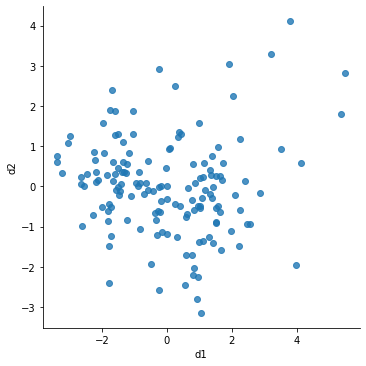

In [120]:
sc = StandardScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
pca = PCA(n_components=2)
pca.fit(Xs)

print(pca.explained_variance_ratio_.cumsum())

Xp = pd.DataFrame(pca.transform(Xs),columns=['d1','d2'])

sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False)

### MDS

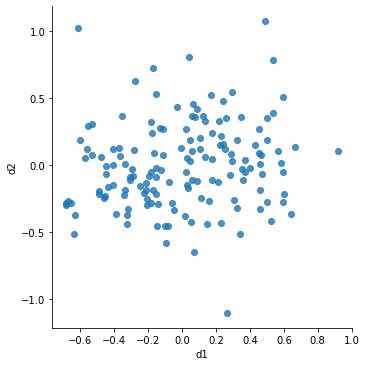

In [121]:
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
mds = MDS(n_components=2)

Xm = pd.DataFrame(mds.fit_transform(Xs),columns=['d1','d2'])

sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

### t-SNE

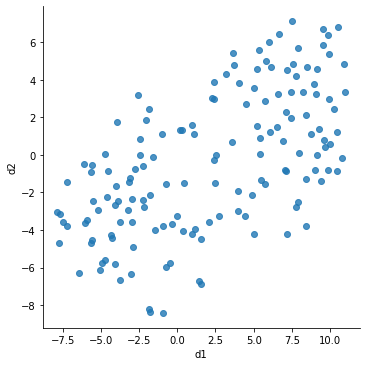

In [122]:
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
tsne = TSNE(n_components=2)

Xt = pd.DataFrame(tsne.fit_transform(Xs),columns=['d1','d2'])

sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False)

## Exploratorio 

In [123]:
X.describe(percentiles=np.arange(0,1,0.1))

,height,weight,hp,attack,defense,special-attack,special-defense,speed
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,12.000000,462.313333,63.973333,72.733333,68.013333,66.920000,65.860000,68.860000
std,9.636341,595.473881,28.534671,26.752574,26.880293,28.502095,24.129413,26.995657
min,2.000000,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
0%,2.000000,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
10%,4.000000,52.800000,35.000000,40.900000,35.000000,35.000000,35.000000,35.000000
20%,6.000000,79.000000,40.000000,48.800000,45.000000,40.000000,45.000000,45.000000
30%,8.000000,124.700000,50.000000,55.000000,52.700000,50.000000,50.000000,50.000000
40%,10.000000,199.600000,55.000000,65.000000,59.200000,55.000000,55.000000,60.000000
50%,10.000000,300.000000,60.000000,70.000000,65.000000,63.000000,65.000000,69.000000


array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'hp'}>],
       [<AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'special-attack'}>],
       [<AxesSubplot:title={'center':'special-defense'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>]],
      dtype=object)

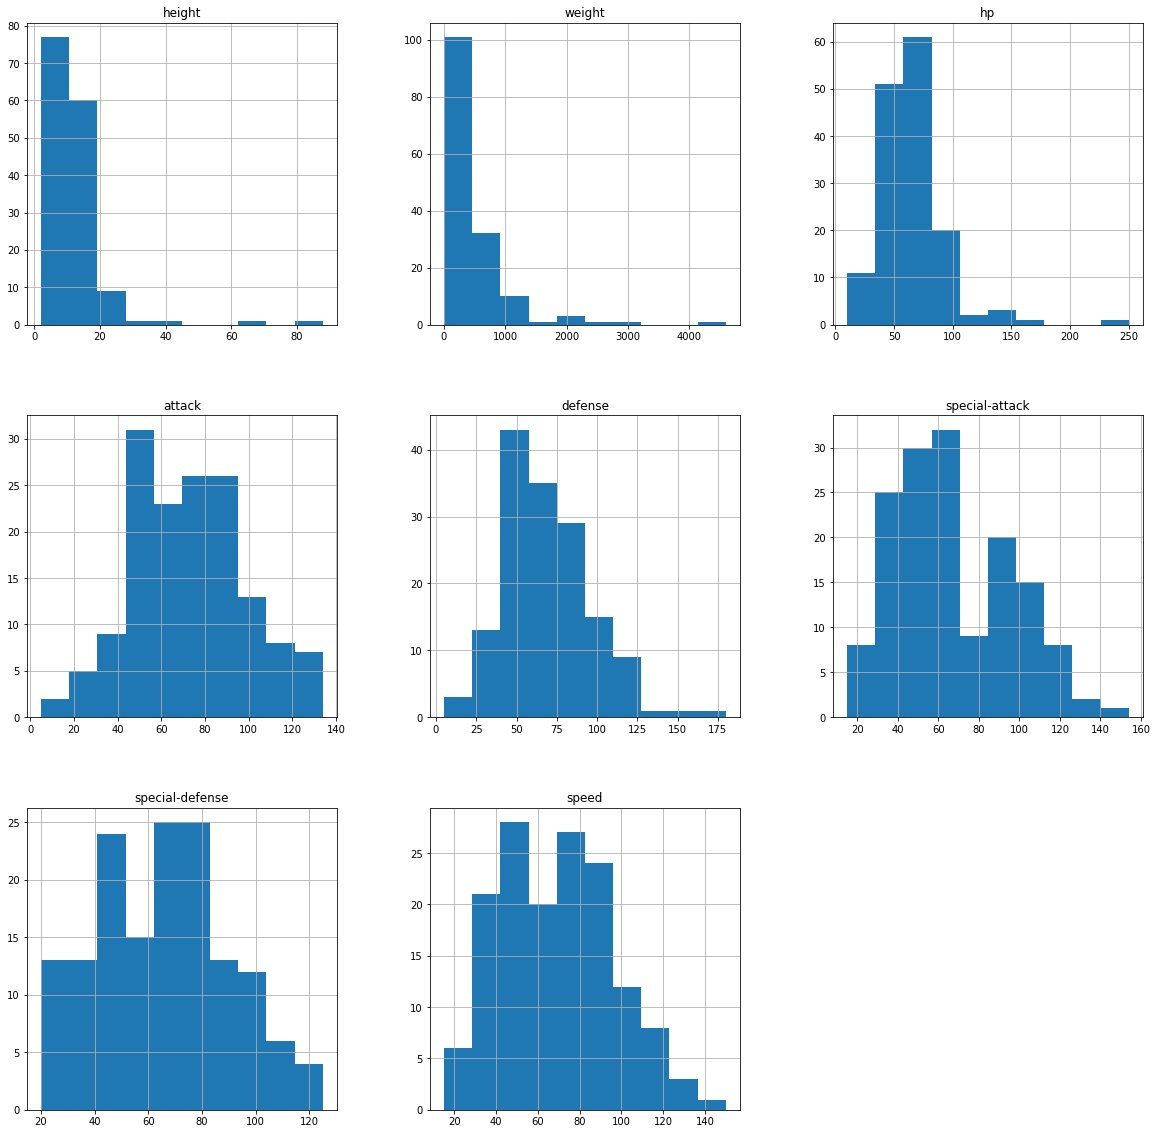

In [124]:
X.hist(figsize=(20,20))

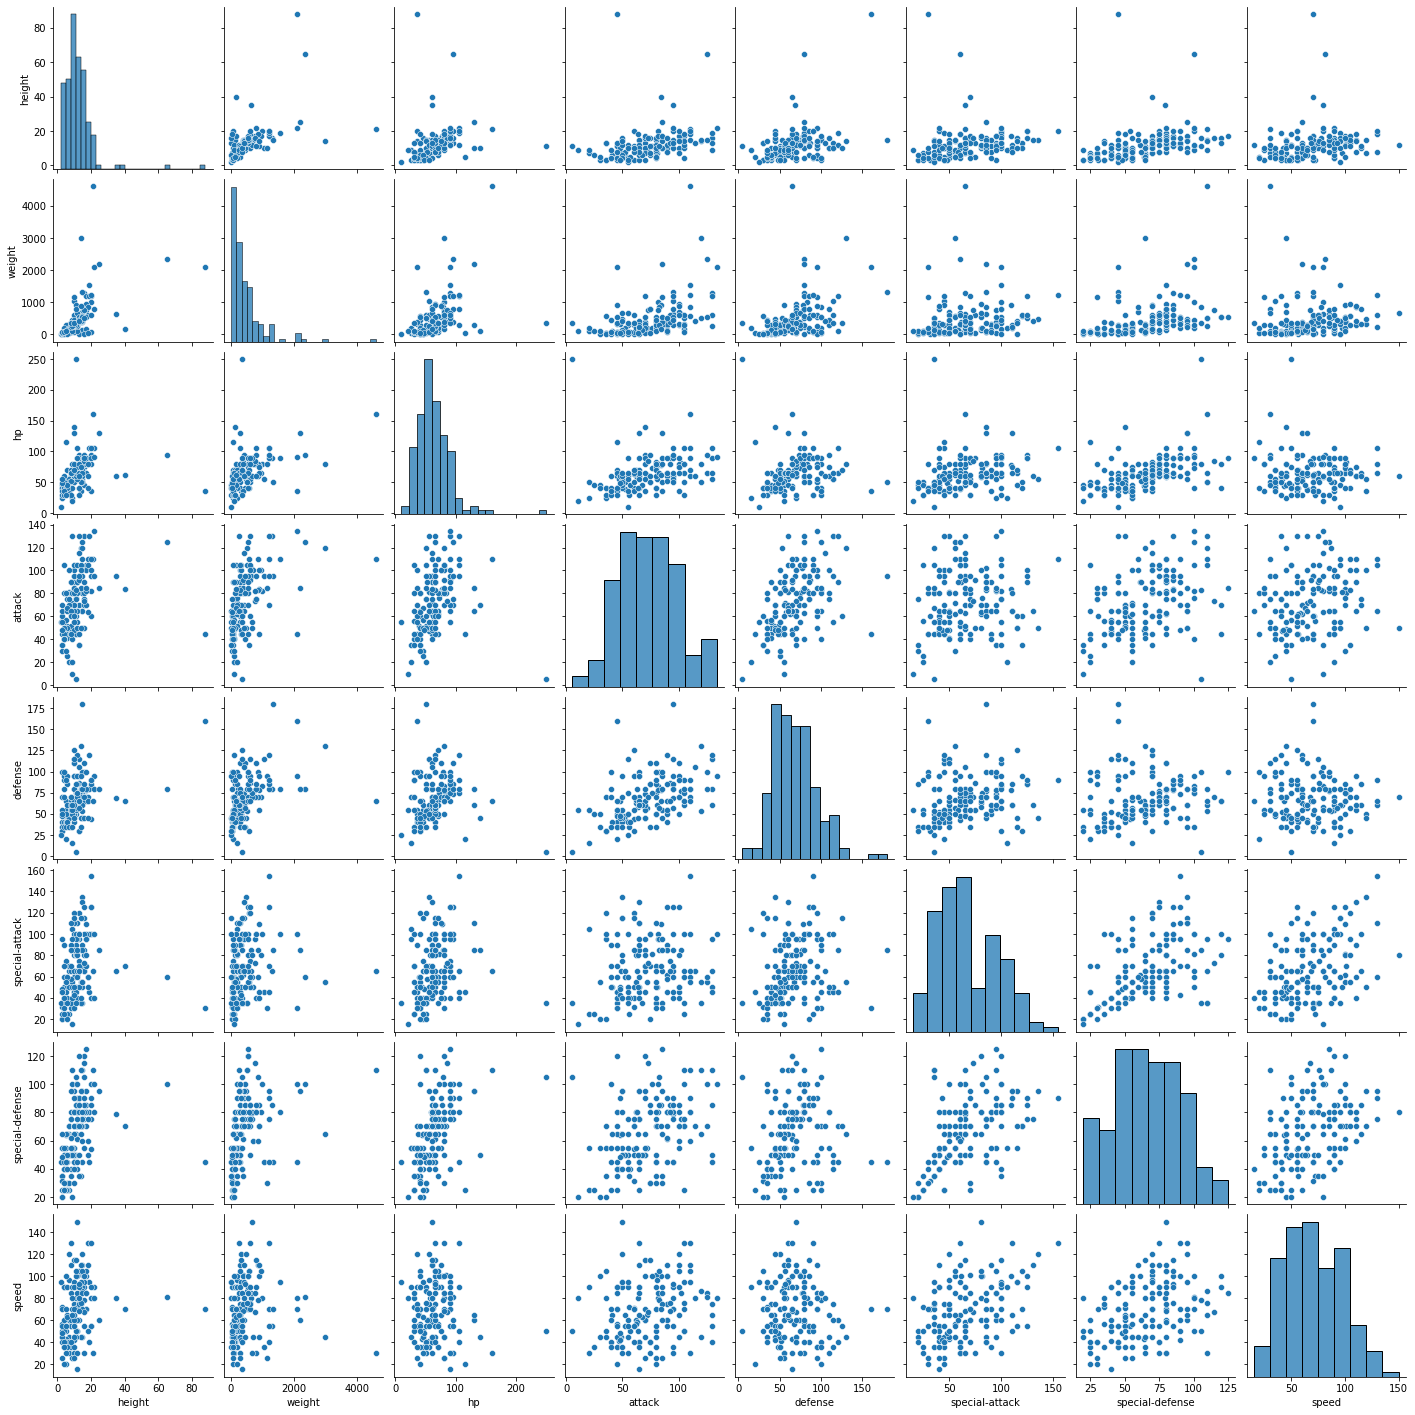

In [125]:
sns.pairplot(X)

In [126]:
X.corr()

,height,weight,hp,attack,defense,special-attack,special-defense,speed
height,1.000000,0.565657,0.252181,0.314643,0.366808,0.164306,0.322323,0.210264
weight,0.565657,1.000000,0.458902,0.466411,0.421558,0.155709,0.385118,0.065740
hp,0.252181,0.458902,1.000000,0.290848,0.110968,0.229199,0.487731,-0.051357
attack,0.314643,0.466411,0.290848,1.000000,0.478537,0.133495,0.364237,0.194989
defense,0.366808,0.421558,0.110968,0.478537,1.000000,0.180089,0.131953,-0.062011
special-attack,0.164306,0.155709,0.229199,0.133495,0.180089,1.000000,0.523204,0.402496
special-defense,0.322323,0.385118,0.487731,0.364237,0.131953,0.523204,1.000000,0.381251
speed,0.210264,0.065740,-0.051357,0.194989,-0.062011,0.402496,0.381251,1.000000


## Número de clusters

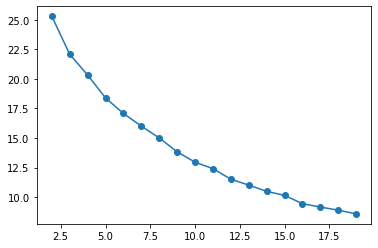

In [127]:
l = []
for k in range(2,20):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    l.append(cl.inertia_)
plt.plot(range(2,20),l,marker='o')

In [128]:
k = 10

In [129]:
varc = X.columns.tolist()

In [130]:
varc

['height',
 'weight',
 'hp',
 'attack',
 'defense',
 'special-attack',
 'special-defense',
 'speed']

## Aglomerativo

0    0.226667
1    0.180000
2    0.086667
3    0.113333
4    0.033333
5    0.200000
6    0.006667
7    0.006667
8    0.026667
9    0.120000
Name: agg, dtype: float64

<AxesSubplot:ylabel='agg'>

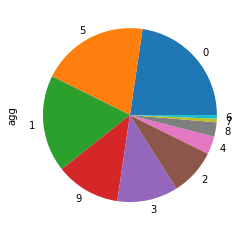

In [141]:
cl = 'agg'
agg = AgglomerativeClustering(n_clusters=k)
X[cl]=Xs[cl]=Xm[cl]=Xt[cl]=Xp[cl]=df[cl] = agg.fit_predict(Xs[varc])
display(df[cl].value_counts(True).sort_index())
df[cl].value_counts().plot(kind='pie')

## K-Medias

0    0.160000
1    0.106667
2    0.106667
3    0.046667
4    0.200000
5    0.033333
6    0.133333
7    0.080000
8    0.006667
9    0.126667
Name: kme, dtype: float64

<AxesSubplot:ylabel='kme'>

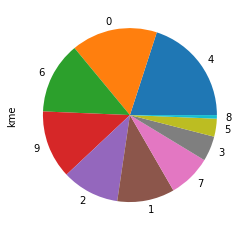

In [142]:
cl = 'kme'
agg = KMeans(n_clusters=k)
X[cl]=Xs[cl]=Xm[cl]=Xt[cl]=Xp[cl]=df[cl] = agg.fit_predict(Xs[varc])
display(df[cl].value_counts(True).sort_index())
df[cl].value_counts().plot(kind='pie')

## Gaussiano Mixto

0    0.073333
1    0.226667
2    0.080000
3    0.120000
4    0.226667
5    0.080000
6    0.066667
7    0.073333
8    0.006667
9    0.046667
Name: gau, dtype: float64

<AxesSubplot:ylabel='gau'>

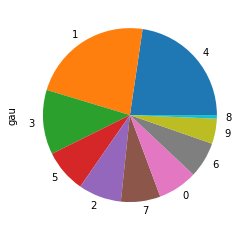

In [143]:
cl = 'gau'
agg = GaussianMixture(n_components=k)
X[cl]=Xs[cl]=Xm[cl]=Xt[cl]=Xp[cl]=df[cl] = agg.fit_predict(Xs[varc])
display(df[cl].value_counts(True).sort_index())
df[cl].value_counts().plot(kind='pie')

## Visualización en 2D del cluster generado

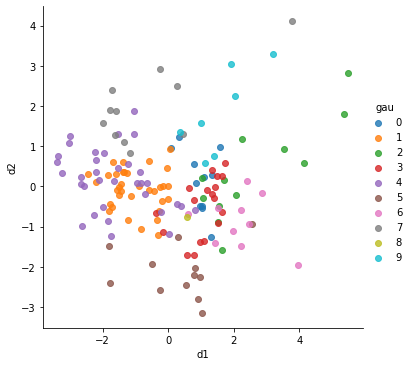

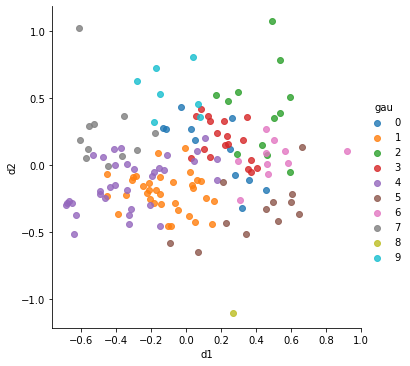

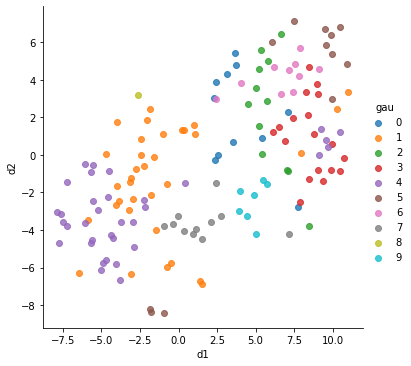

In [151]:
sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False,hue='gau')
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='gau')
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='gau')

## Perfilamiento

In [146]:
from scipy.stats import kruskal

Se toma la columna **gau** que contiene las etiquetas de los clusters, posteriormente se agrupan los datos por cada etiqueta para finalmente tener una lista de listas que contienen el valor de la variable y que cada una representa un grupo. De esta forma podemos ver si para la variable *v* hay diferencias estadísticas dependiendo del grupo en el que se encuentre.

$p-value<\alpha$ Son diferentes y por tanto la variable sirve para perfilar

In [161]:
pd.DataFrame(map(lambda v:(v,kruskal(*[d[v].tolist() for _,d in df.groupby('gau')]).pvalue),
       varc),columns=['variable','p-value'])

,variable,p-value
0,height,1.086250e-12
1,weight,5.960819e-12
2,hp,2.944325e-08
3,attack,6.580039e-15
4,defense,9.245333e-15
5,special-attack,8.044713e-16
6,special-defense,2.070283e-17
7,speed,2.155153e-12


In [165]:
from sklearn.feature_selection import SelectKBest

In [166]:
sk = SelectKBest(k=5)

In [167]:
sk.fit(X[varc],X['gau'])

SelectKBest(k=5)

In [169]:
best = [v for v,x in zip(varc,sk.get_support()) if x]
best 

['hp', 'attack', 'defense', 'special-attack', 'special-defense']

In [175]:
df[best+['gau']].groupby('gau').mean().to_clipboard()

In [176]:
df[best].mean().to_frame().T.to_clipboard()

## Ejemplos del cluster

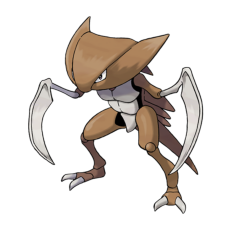

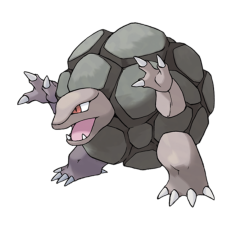

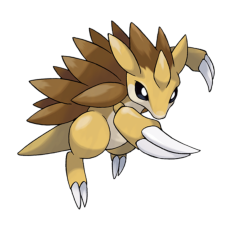

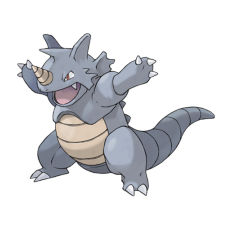

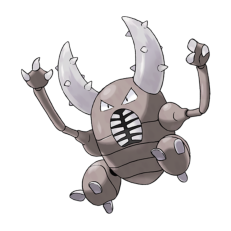

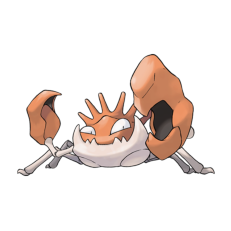

In [207]:
k = 6
cl = 9
for url in df.loc[df['gau']==cl].sample(k).sprites:
    im = io.imread(url)
    plt.figure()
    plt.imshow(im)
    plt.axis('off')

## Persistencia del modelo

In [211]:
import pickle
pickle.dump((sc, agg),open('cluster_gaussiano_pokemon.pkl','wb'))

## Aplicar modelo a nuevos datos

In [213]:
nuevos_datos = pd.read_clipboard(header=None)[range(2)]
nuevos_datos.columns = ['#','nombre']

In [215]:
nuevos_datos = pd.concat(map(get_pokemon_data,nuevos_datos['#']),ignore_index=True)

In [223]:
Xn = nuevos_datos[varc].copy()

In [233]:
nuevos_datos['gau'] = agg.predict(sc.fit_transform(Xn[varc]))

KeyboardInterrupt: 

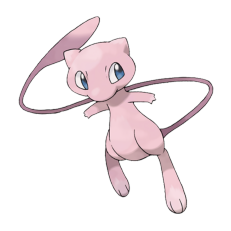

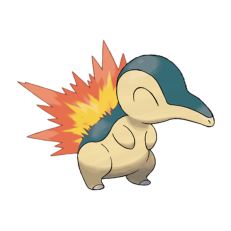

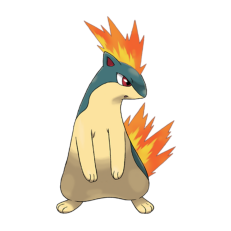

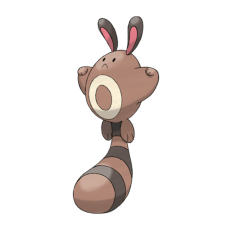

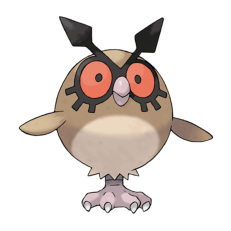

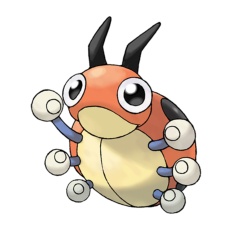

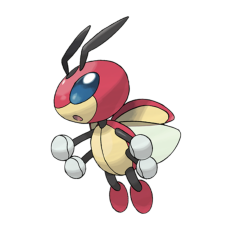

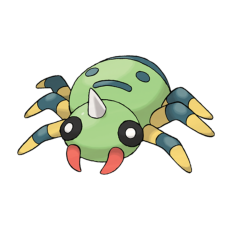

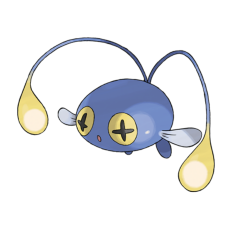

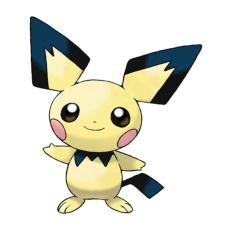

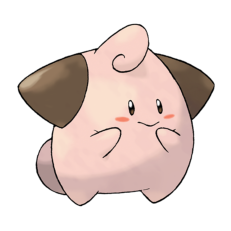

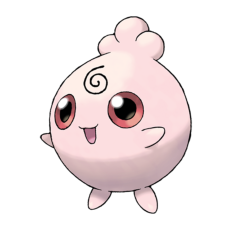

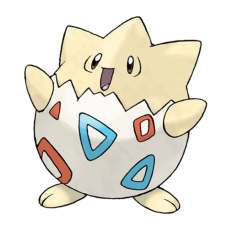

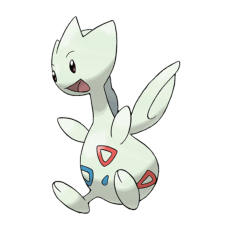

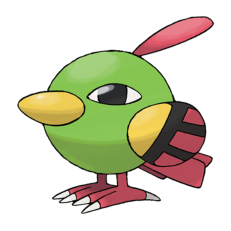

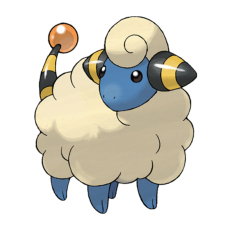

<Figure size 432x288 with 0 Axes>

In [256]:
cl = 1
for url in nuevos_datos.loc[nuevos_datos['gau']==cl].sprites:
    im = io.imread(url)
    plt.figure()
    plt.imshow(im)
    plt.axis('off')